___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
# rename ile gerekli sütunların adını yeniden adlandırıyoruz. (Daha düzgün olması için)

In [4]:
df.head()

CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)
# Clustering ve PCA ile çalışırken sadece numerik veriler kullanılmalıdır.

In [8]:
df.head()

Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40

In [9]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [10]:
# df.Gender.replace('Male',0, inplace=True)
# df.Gender.replace('Female',1, inplace=True)
# Kategorik olan Gender sütunumuzu numerik verilere dönüştürüyoruz. Bunu get_dummies le de yapabilirdik. 

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





---
---

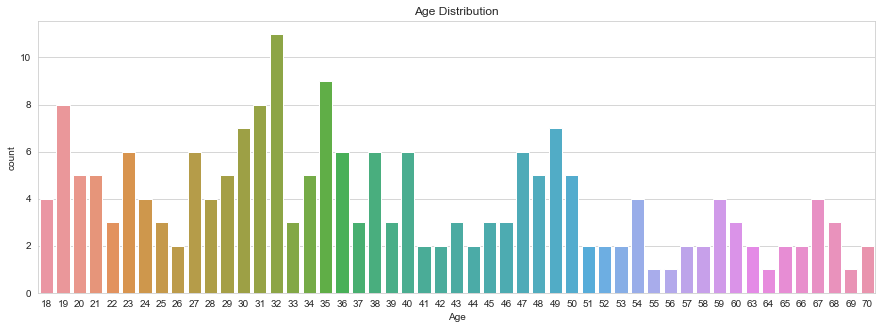

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

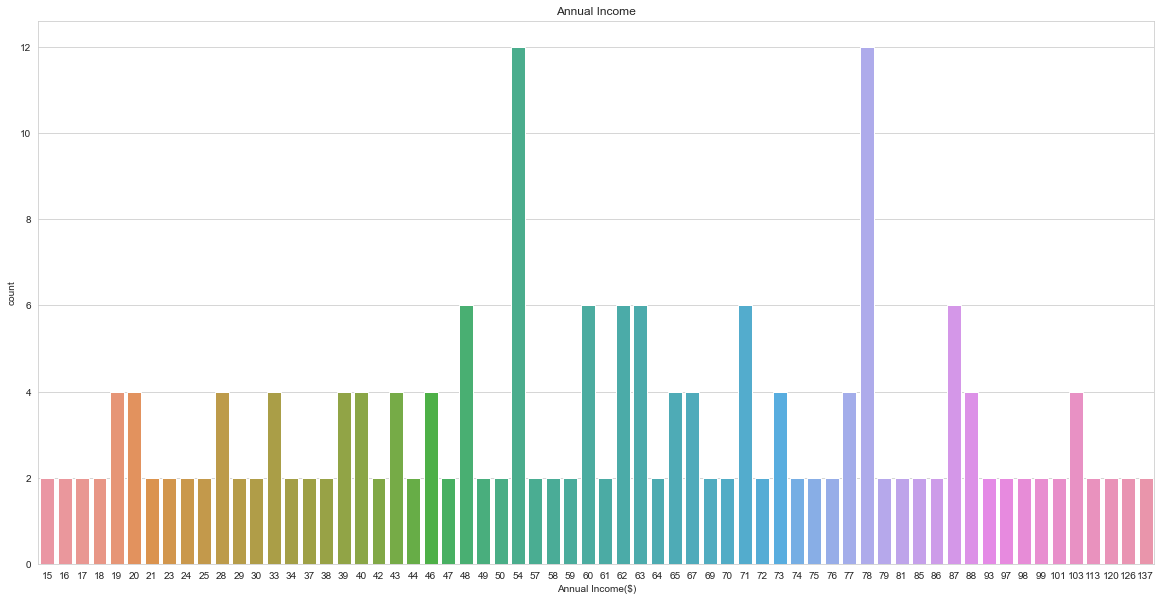

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

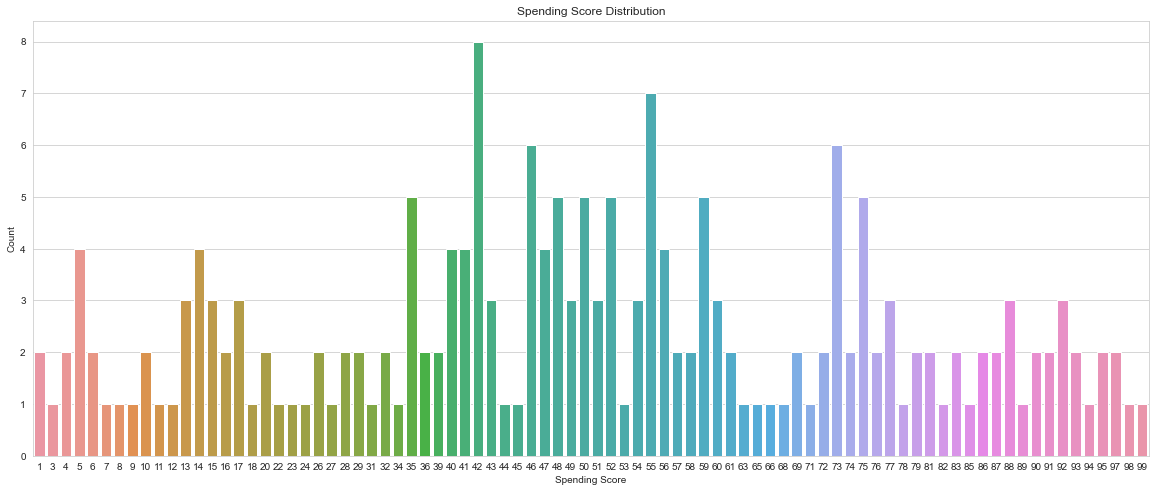

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show();

Text(0, 0.5, 'Count')

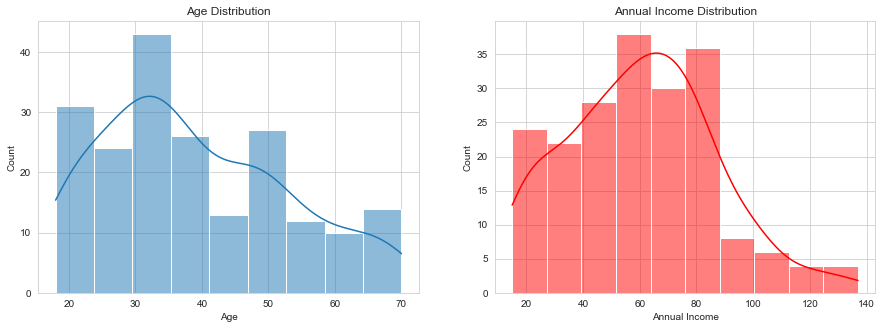

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
# Yaş ve yıllık gelir in dağılımını kontrol ediyoruz.

(-1.25, 1.25, -1.25, 1.25)

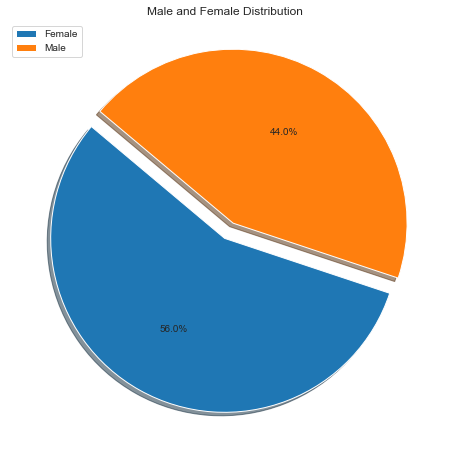

In [15]:
plt.figure(figsize=(8,8))

explode = [0,0.1] # Piechart ın oranları arasındaki boşluğu belirliyor
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

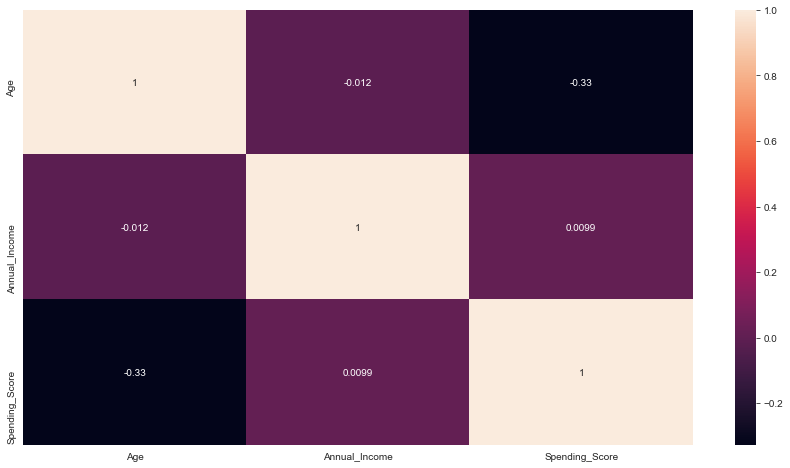

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()
# Features larımız aralarındaki correlation kontrol ediyoruz.

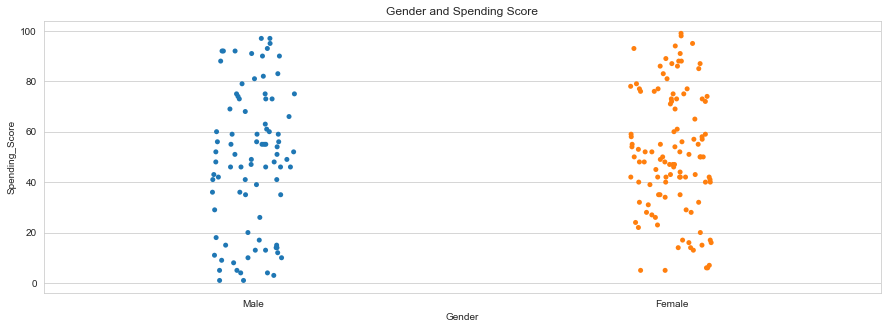

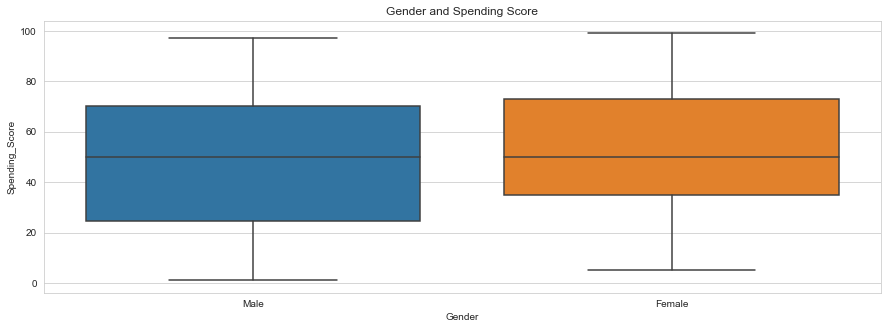

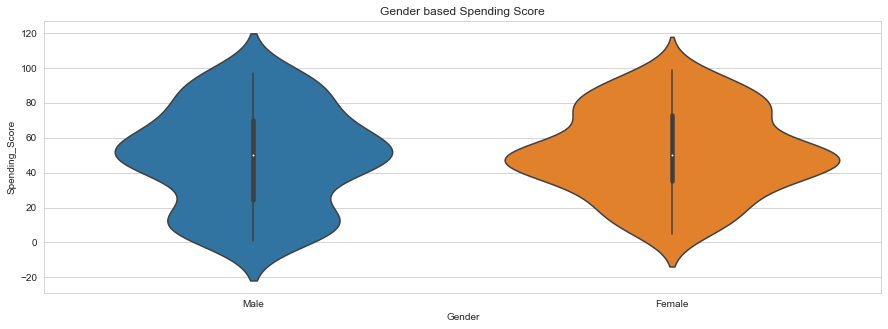

In [17]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()
# stripplot kategorik verileri karşı gelen numerik verileri scatterplot gibi çizdirmeye yarıyor. Gender sütunumuz kategorik olduğu için bunu kullandık. Çünkü scatterplot numerik değerlerle çalışıyor. 
# Cinsiyete göre Spending_Score farklı grafiklerle kontrol ediyoruz ve fazla fark olmadığını gözlemliyoruz. 

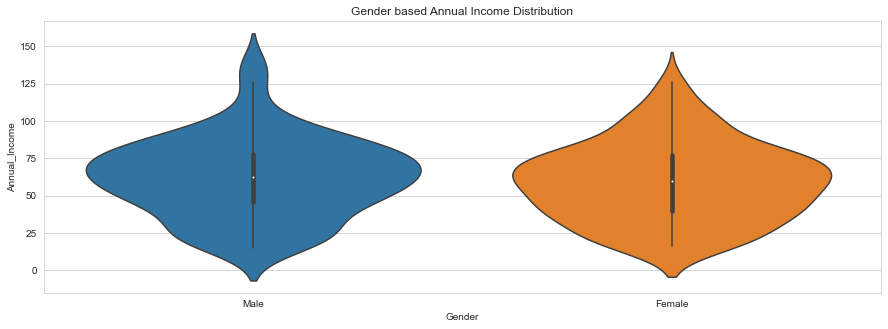

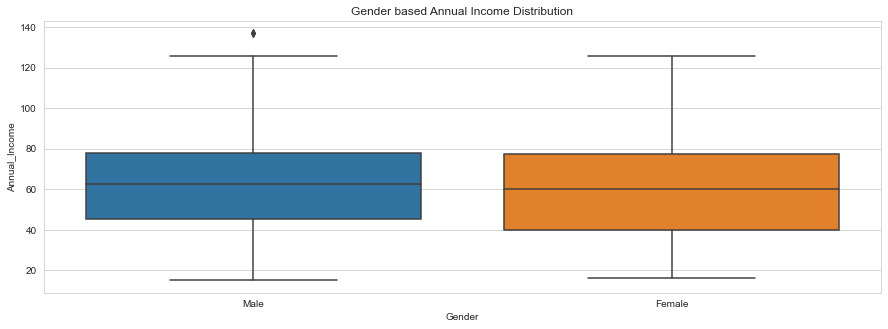

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()
# Cinsiyete göre Annual_Income mı kontrol ediyoruz. Burada da fazla bir fark göremiyoruz (Kümeleme yapabilmek için). Cinsiyet bize kümeleme için bir insight sağlamadı. 

<Figure size 1152x576 with 0 Axes>

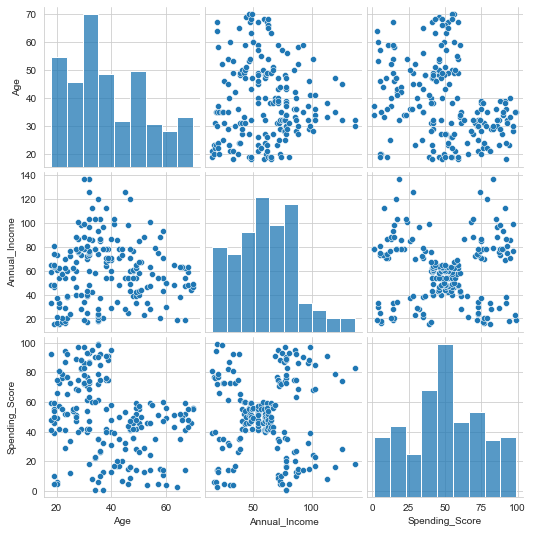

In [19]:
plt.figure(figsize=(16, 8))
sns.pairplot(df)
plt.show()

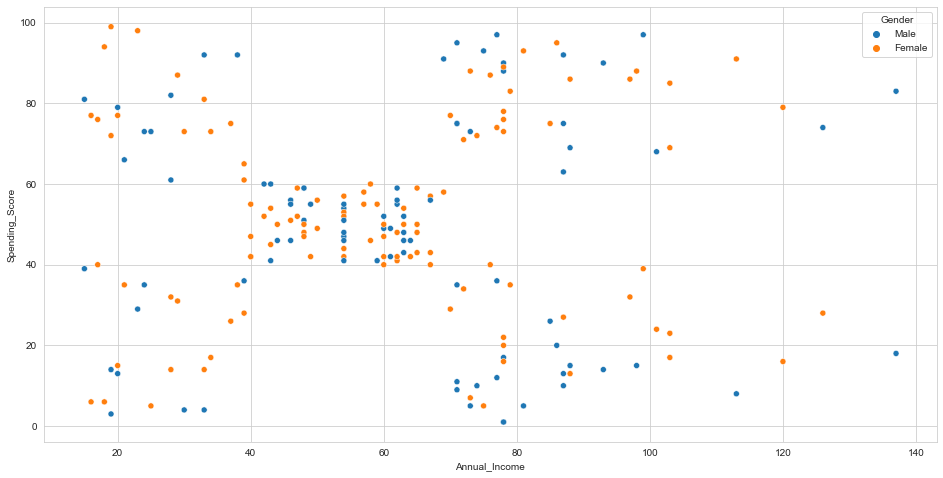

In [20]:
#fig, ax = plt.subplots(figsize=(16, 8))
#sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax, hue="Gender", data=df)
#plt.show()

plt.figure(figsize=(16,8))
sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

# 'Annual_Income'  ve 'Spending_Score' scatterplot ile kontrol ettiğimizde bazı kümelenmelerin olduğunu görüyoruz.

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [21]:
# !pip install pyclustertend

In [22]:
df_2 = df.drop(columns="Gender")
# Kategorik veriler kümelenmede iyi sonuçlar almamızı engellediği için kategorik olan Gender sütununu düşürüyoruz.

In [23]:
from pyclustertend import hopkins

In [24]:
hopkins(df_2,df_2.shape[0])
# Sıfıra yakınlık iyi bir kümelenmenin göstergesi

0.31346717684698805

In [25]:
#x1 = pd.DataFrame(df.loc[:,['Age','Spending_Score']].values, columns = ['Age','Spending_Score'])
#x1 # second way

x1 = df.loc[:,['Age','Spending_Score']]
x1
# Yaşa göre harcama score u kümelemek için DataFrame mizi oluşturuyoruz.

Age  Spending_Score
0     19              39
1     21              81
2     20               6
3     23              77
4     31              40
..   ...             ...
195   35              79
196   45              28
197   32              74
198   32              18
199   30              83

[200 rows x 2 columns]

In [26]:
hopkins(x1, x1.shape[0])

0.2884093040785327

#### *ii. Determine optimal number of clusters*

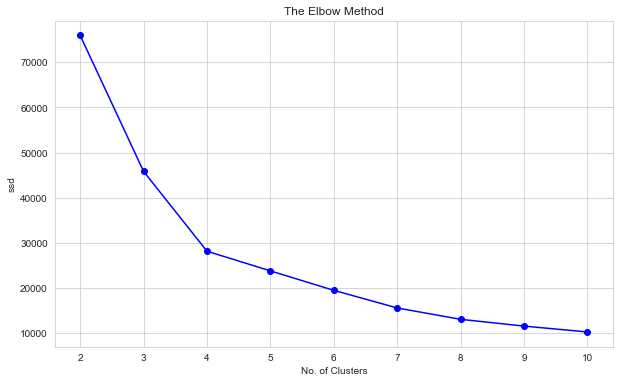

In [27]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()
# inertia kümenin kendi içerisindeki ne kadar yoğun bir şekilde kümelendiğini gösteriyor. inertia değerinin küçük olması beklenir.
# Keskin düşüş 4 te başlıyor. Küme sayısı için 4 uygun gözüküyor.



In [28]:
ssd

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23811.5235247209,
 19502.407839362197,
 15598.876804915515,
 13082.951489621495,
 11584.675652356902,
 10282.71312366981]

In [29]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4354.060042
4    -4309.115685
5    -3903.531034
6    -2515.925315
7    -1498.275837
8    -1301.962529
dtype: float64

In [30]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  30108.479394
3  17675.093049
4   4354.060042
5   4309.115685
6   3903.531034
7   2515.925315
8   1498.275837
9   1301.962529

<AxesSubplot:>

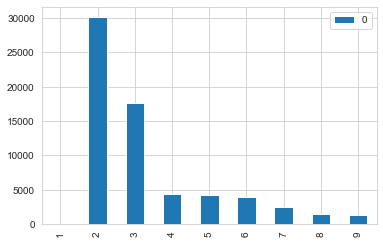

In [31]:
df_diff.plot(kind='bar')

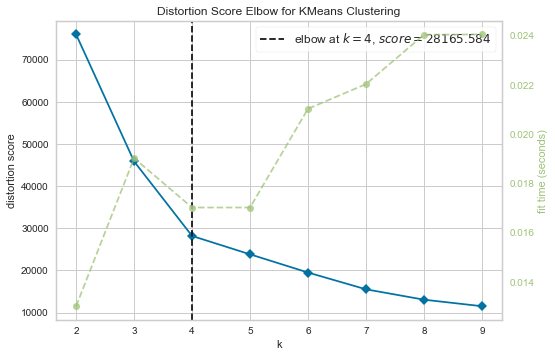

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()
# yellowbrick te küme sayısının 4 olması gerektiğini gösteriyor.

In [33]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# silhouette_score verilerin küme içerisinde yakınlık, kümelerin kendi aralarındaki uzaklığına göre score veriyor. Küme sayısı belirlenirken bu scores ın 1 e en yakın olanları değerlendirilmelidir.

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


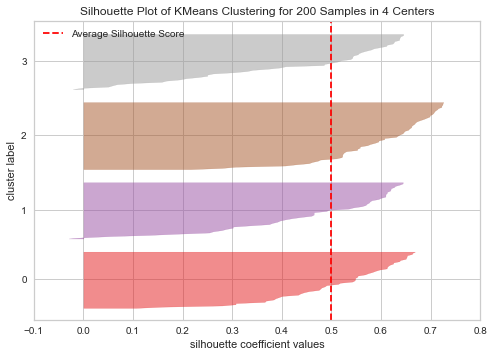

In [34]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)
visualizer.poof();

#### *iii. Apply K Means*

In [35]:
kmeans = KMeans(n_clusters = 4)
# Küme sayımızı 4 olarak belirledik.

In [36]:
kmeans.fit_predict(x1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [37]:
kmeans.fit(x1)

KMeans(n_clusters=4)

In [38]:
kmeans.labels_

array([3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 3, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 3,
       0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
y_means = kmeans.fit_predict(x1)
# Sadece fit olarak ta kullanabiliriz. Ancak fit_predict de yukarıdaki gibi direk sonuçları gösteriyor. fit de ayrıca label_ da kullanmamız gerekiyor.

In [40]:
x1["cluster"] = kmeans.fit_predict(x1)
# x1['cluster'] = y_means # second way
# Oluşturulan kümeleri DataFrame mize ekliyoruz.

In [41]:
x1

Age  Spending_Score  cluster
0     19              39        2
1     21              81        1
2     20               6        0
3     23              77        1
4     31              40        2
..   ...             ...      ...
195   35              79        1
196   45              28        0
197   32              74        1
198   32              18        0
199   30              83        1

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

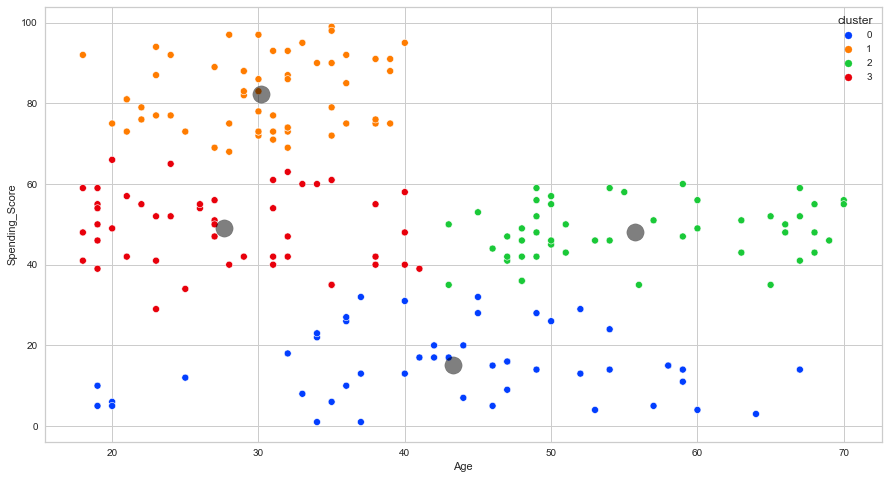

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
# Yaş arrtıkça harcama score nun düştüğünü gözlemliyoruz. Acaba yaş sıkıntısından dolayı markete gidemiyor veya internetten alışveriş yapamıyor mu? Bu yüzden sağ orta grubunu incelemeye almalıyız.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [43]:
x2 = df.loc[:,['Annual_Income','Spending_Score']]
x2.head()
# Yıllık gelir ve harcama score na göre kümeleme yapmak için bunlarla DataFrame mizi oluşturuyoruz.

Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

In [44]:
hopkins(x2,x2.shape[0])

0.3097450622891808

#### *ii. Determine optimal number of clusters*

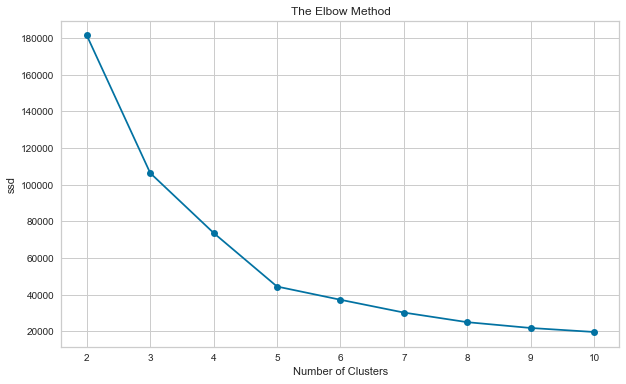

In [45]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(x2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()
# Keskin düşüş 5 te azalmaya başlıyor.

In [46]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  75015.222897
3  32668.584023
4  29231.333592
5   7214.640937
6   6974.157303
7   5247.817858
8   3161.674067
9   2178.092434

<AxesSubplot:>

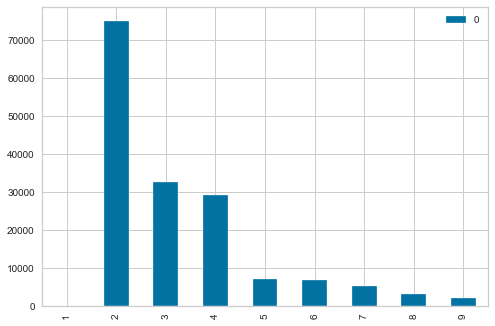

In [47]:
df_diff.plot(kind='bar')
# barplot ile de azalımları gözlemliyoruz.

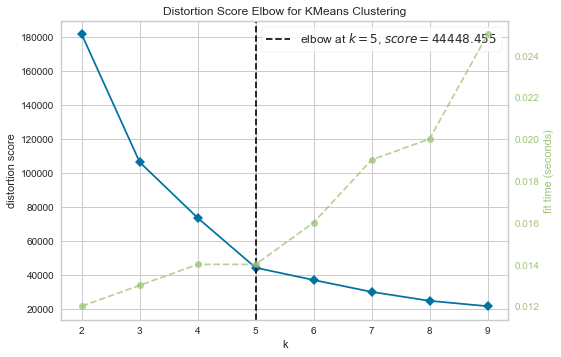

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()
# Yellowbrick te 5 olarak belirledi.

In [49]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# silhouette_score ile de 5 küme sayısının score unu karşılaştırıyoruz. 5 in en yüksek score olduğunu gözlemliyoruz.
# Not: Her zaman en yüksek score seçilmeli diye bir kural yoktur. silhouette_score nu yukarıdaki yellowbrick vb. ile birlikte değerlendirmeliyiz.

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


#### *iii. Apply K Means*

In [50]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit_predict(x2)

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [51]:
x2['cluster'] = kmeans2.fit_predict(x2)
x2

Annual_Income  Spending_Score  cluster
0               15              39        3
1               15              81        2
2               16               6        3
3               16              77        2
4               17              40        3
..             ...             ...      ...
195            120              79        0
196            126              28        4
197            126              74        0
198            137              18        4
199            137              83        0

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

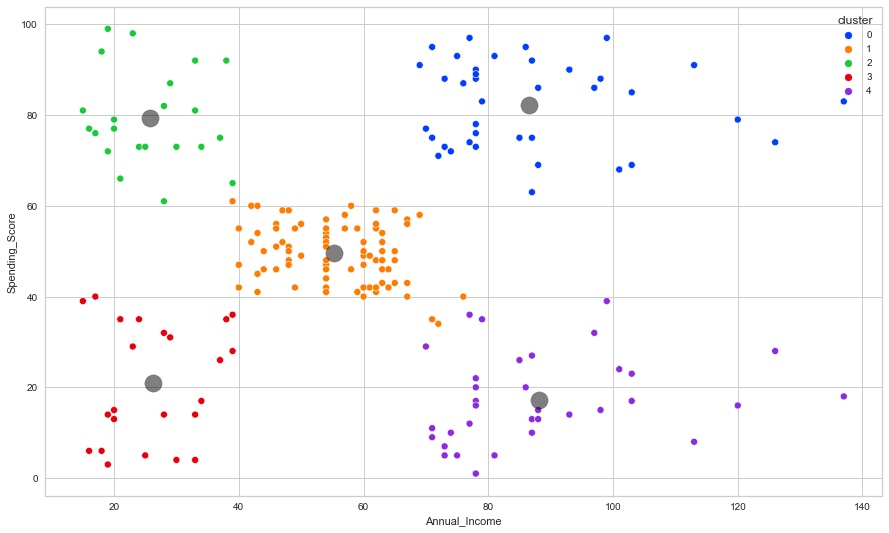

In [52]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
# İstatiksel olarak hesaplandığında şirketlere en fazla geliri (%80) yıllık geliri yüksek ve harcamaları yüksek olan müsterilerin (sağ üst köşe) sağladığı gözlemlenmiş. Bu yüzden amacımız yıllık geliri yüksek olduğu halde az harcama yapanları (sağ alt köşe) fazla harcama yapananlara (sağ üst köşe) yaklaştırmalıyız (ilk hedef)
# Ayrıca yıllık geliri yüksek ve harcamaları yüksek olan müşterileri (sağ üst köşe) elimizde tutmak için özel teklifler yapmalıyız. Ortadaki orta gelirli (gelir ve harcamaları normal) müşterilere ise promosyon ve hediyeler sağlamalıyız.
# centers[:, 0] ve centers[:, 1] ları kümelerimizin merkezlerini görmek için kullanıyoruz.

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [ ]:
# x1 (Age, Spending_Score), x2 (Annual_Income, Spending_Score)

In [53]:
from scipy.cluster.hierarchy import linkage

In [54]:
hc_ward = linkage(y = x1, method = "ward")
hc_complete = linkage(x1, "complete")
hc_average = linkage(x1, "average")
hc_single = linkage(x1, "single")

In [55]:
from scipy.cluster.hierarchy import dendrogram

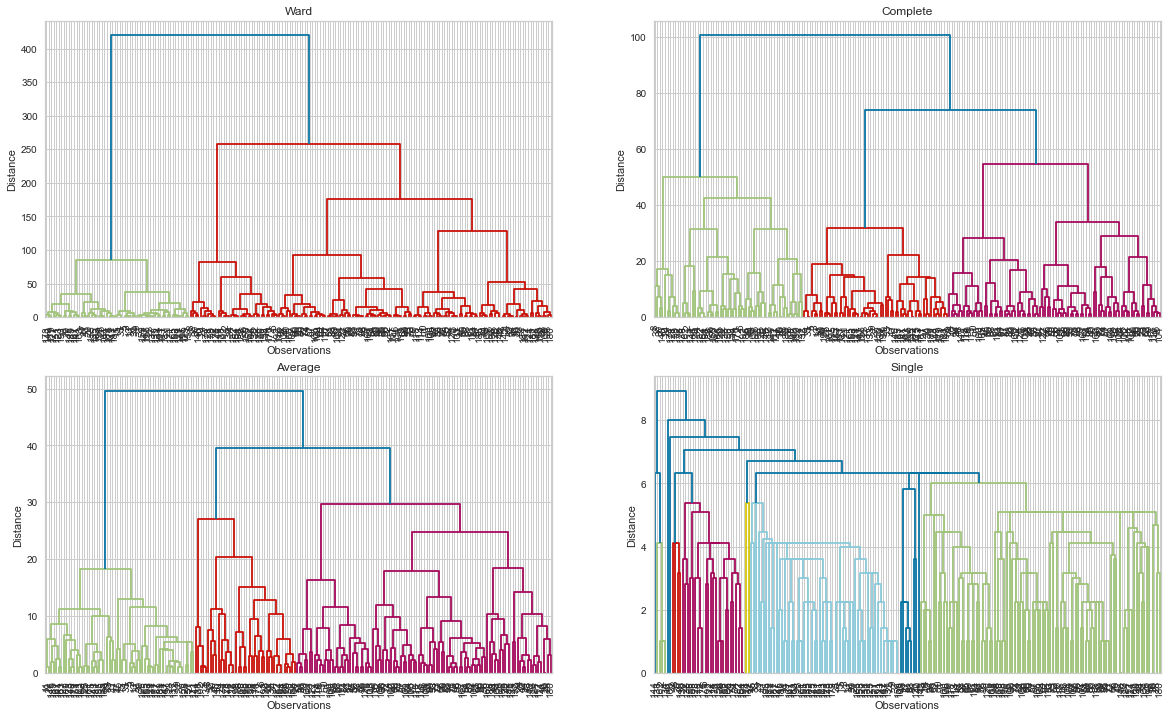

In [56]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);
# ward bize 2 küme önerdiği için kümeleri yeşil ve kırmızı olarak ayırmış. Dendogram ı bize kümeleme için insight vermesi için gözlemliyoruz. 

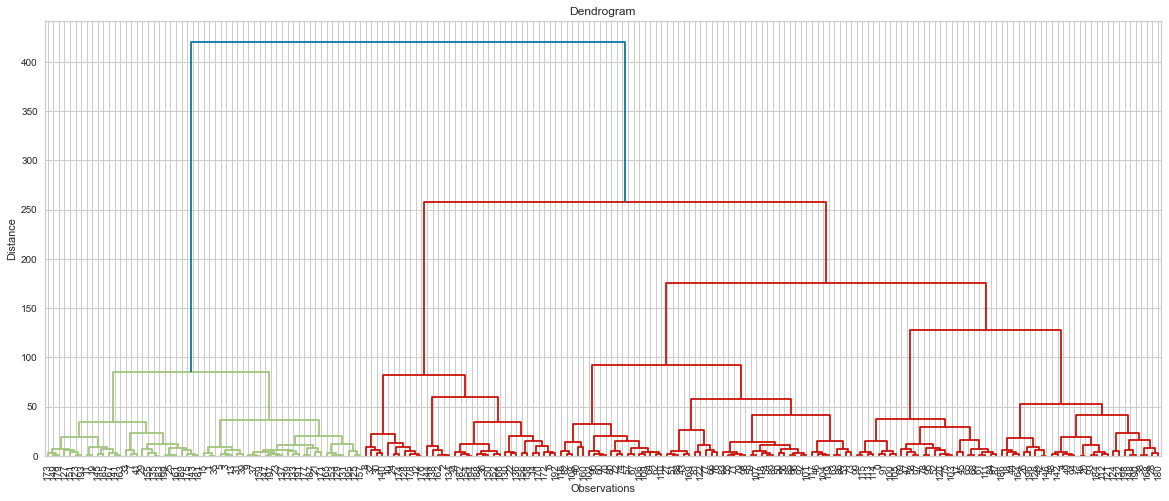

In [57]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# AgglomerativeClustering in silhouette_score larına bakarak küme sayımızı belirlemeye çalışıyoruz.

For n_clusters=2, the silhouette score is 0.4547771599309071
For n_clusters=3, the silhouette score is 0.4297379969523323
For n_clusters=4, the silhouette score is 0.45330508393538804
For n_clusters=5, the silhouette score is 0.4184559723995634
For n_clusters=6, the silhouette score is 0.4186336462827822
For n_clusters=7, the silhouette score is 0.39096712594789834
For n_clusters=8, the silhouette score is 0.3901862077299866
For n_clusters=9, the silhouette score is 0.39918951167860983
For n_clusters=10, the silhouette score is 0.38880655432571715


### X2

In [60]:
hc_ward = linkage(y = x2, method = "ward")
hc_complete = linkage(x2, "complete")
hc_average = linkage(x2, "average")
hc_single = linkage(x2, "single")

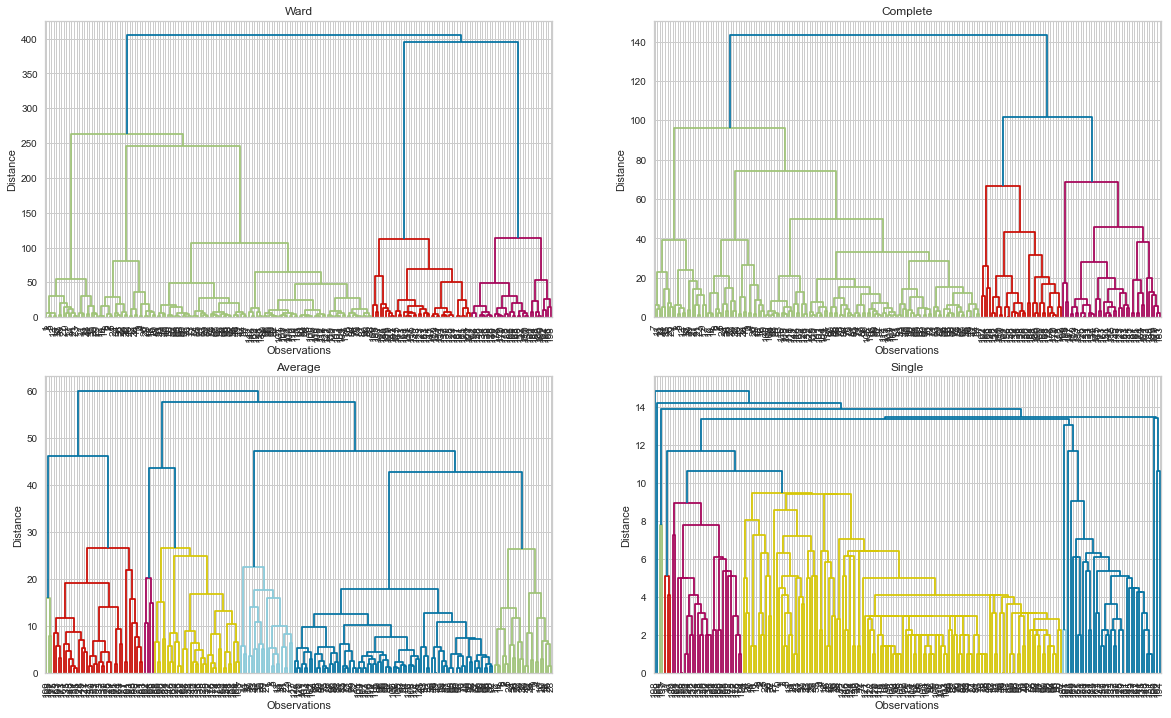

In [61]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);
# x2 datamızın dendrogram grafiklerini çizdiriyoruz.

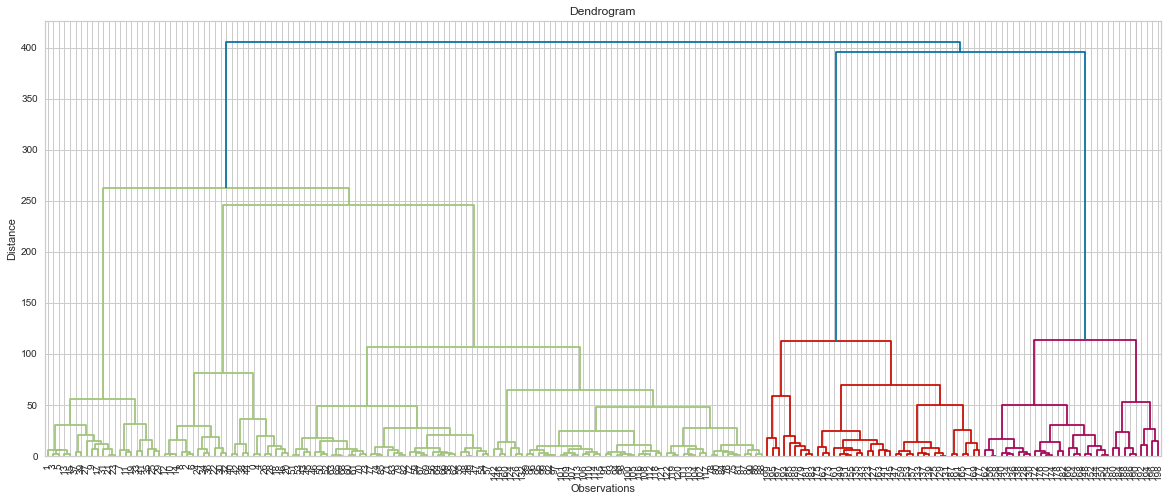

In [62]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [63]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# x2 datamız daha iyi silhouette_score ları verdi.

For n_clusters=2, the silhouette score is 0.3669823532685482
For n_clusters=3, the silhouette score is 0.4620766563638499
For n_clusters=4, the silhouette score is 0.49180225443003567
For n_clusters=5, the silhouette score is 0.5533776721839905
For n_clusters=6, the silhouette score is 0.5383909702525491
For n_clusters=7, the silhouette score is 0.5201836232618119
For n_clusters=8, the silhouette score is 0.4326515955083691
For n_clusters=9, the silhouette score is 0.43896364636577545
For n_clusters=10, the silhouette score is 0.43428538939200906


#### ii. *Apply Agglomerative Clustering*

In [64]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(x1)

In [65]:
x1['cluster2'] = y_agg
x1.head()

Age  Spending_Score  cluster  cluster2
0   19              39        3         0
1   21              81        1         3
2   20               6        0         2
3   23              77        1         3
4   31              40        3         0

### X2

In [66]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(x2)

In [67]:
x2['cluster2'] = y_agg2
x2.head()

Annual_Income  Spending_Score  cluster  cluster2
0             15              39        3         4
1             15              81        2         3
2             16               6        3         4
3             16              77        2         3
4             17              40        3         4

#### iii. *Visualizing and Labeling All the Clusters* 

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

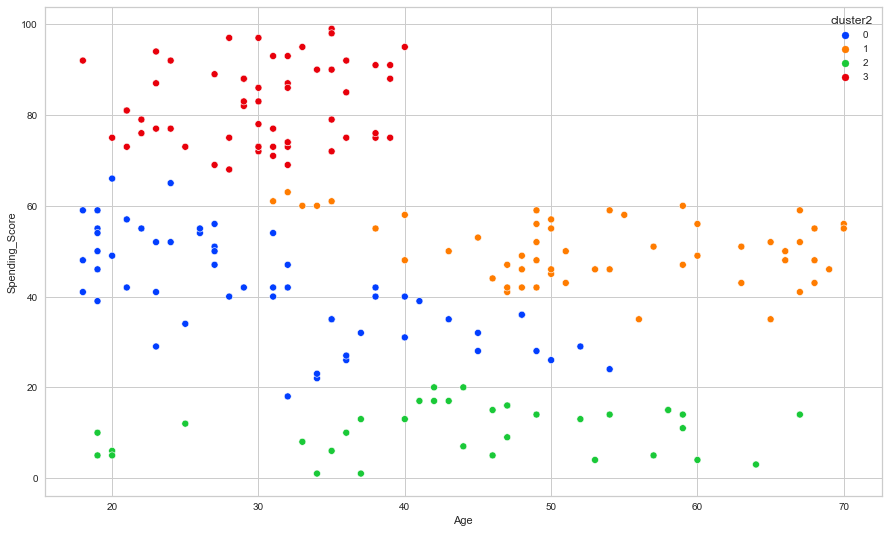

In [68]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette="bright")
# Age ve Spending_Score oluşturulan cluster2 (Aggloremative) ye göre görselleştiriyoruz.

Text(0.5, 1.0, 'Agg')

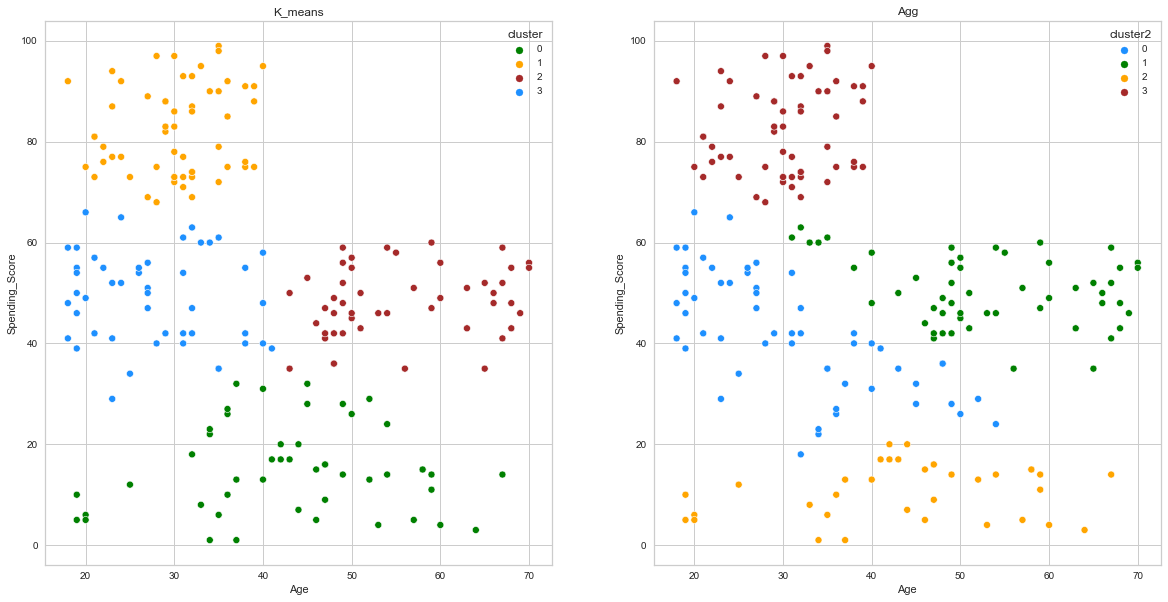

In [69]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")
# Age ve Spending_Score solda KMeans, sağda Aggloremative göre birlikte gözlemliyoruz.

### X2

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

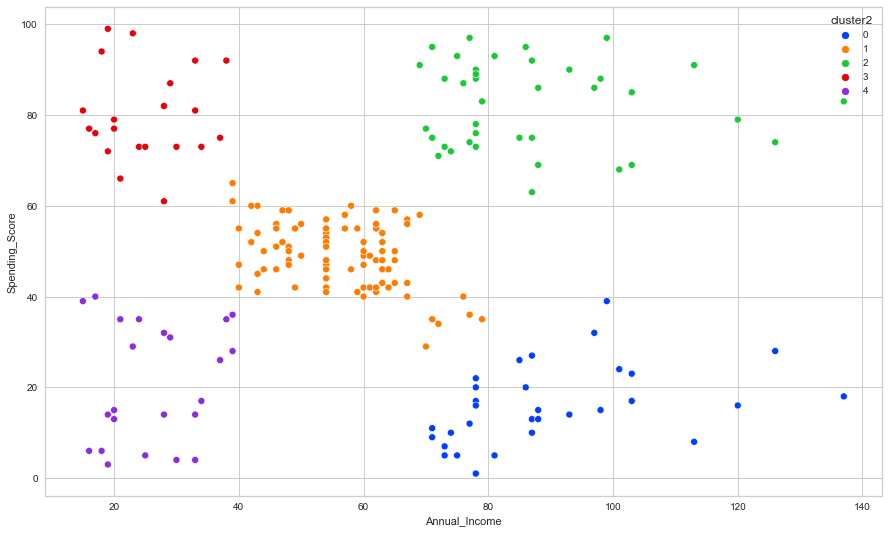

In [70]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

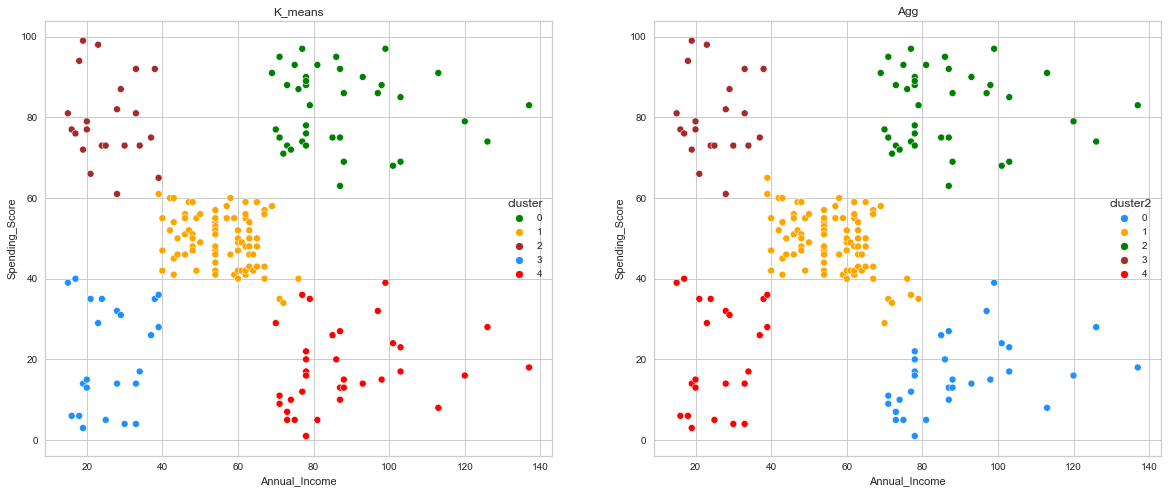

In [71]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2, palette=['green',
                                                            'orange','brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2, palette=['dodgerblue',
                                                            'orange', 'green', 'brown','red'])
plt.title("Agg")
# Annual_ıncome ve Spending_Score solda KMeans, sağda Aggloremative göre birlikte gözlemliyoruz.

In [72]:
x2

Annual_Income  Spending_Score  cluster  cluster2
0               15              39        3         4
1               15              81        2         3
2               16               6        3         4
3               16              77        2         3
4               17              40        3         4
..             ...             ...      ...       ...
195            120              79        0         2
196            126              28        4         0
197            126              74        0         2
198            137              18        4         0
199            137              83        0         2

[200 rows x 4 columns]

In [73]:
x2.cluster.value_counts()

1    81
0    39
4    35
3    23
2    22
Name: cluster, dtype: int64

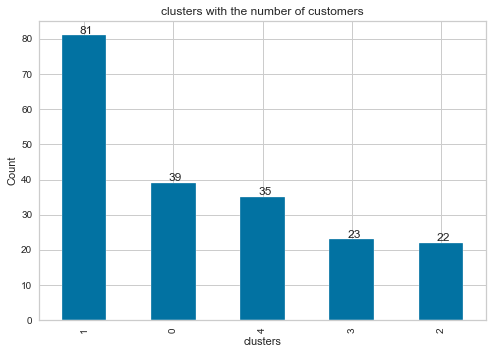

In [74]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x2.cluster.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))
# x2.cluster sayılarımızı barplot ile gösteriyoruz.

In [75]:
df

Gender  Age  Annual_Income  Spending_Score
0      Male   19             15              39
1      Male   21             15              81
2    Female   20             16               6
3    Female   23             16              77
4    Female   31             17              40
..      ...  ...            ...             ...
195  Female   35            120              79
196  Female   45            126              28
197    Male   32            126              74
198    Male   32            137              18
199    Male   30            137              83

[200 rows x 4 columns]

In [76]:
df["cluster"] = x2.cluster
df.head()

Gender  Age  Annual_Income  Spending_Score  cluster
0    Male   19             15              39        3
1    Male   21             15              81        2
2  Female   20             16               6        3
3  Female   23             16              77        2
4  Female   31             17              40        3

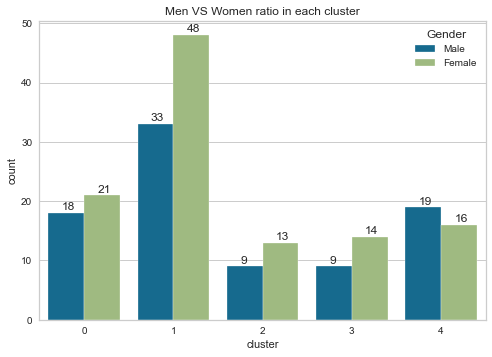

In [77]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))
# Cinsiyetlerin cluster ların içerideki dağılıma bakıyoruz.

In [78]:
df.groupby("cluster").mean()

Age  Annual_Income  Spending_Score
cluster                                          
0        32.692308      86.538462       82.128205
1        42.716049      55.296296       49.518519
2        25.272727      25.727273       79.363636
3        45.217391      26.304348       20.913043
4        41.114286      88.200000       17.114286

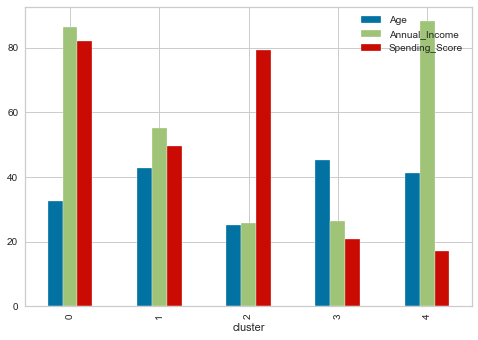

In [79]:
df.groupby("cluster").mean().plot(kind='bar')
plt.show()
# df datamızı cluster lara (Annual_Score ve Spending_Score göre oluşturulan) göre gruplayıp diğer sütunların ortalamasını görselleştiriyoruz. Bu cluster lar bize daha iyi insight verdiği için değerlendirmemizi (Conclusion) bu grafiğe göre yapacağız. 

In [80]:
df.groupby(x1.cluster).mean().iloc[:,:-1]

Age  Annual_Income  Spending_Score
cluster                                          
0        43.291667      66.937500       15.020833
1        30.175439      66.070175       82.350877
2        55.708333      54.770833       48.229167
3        27.617021      53.276596       49.148936

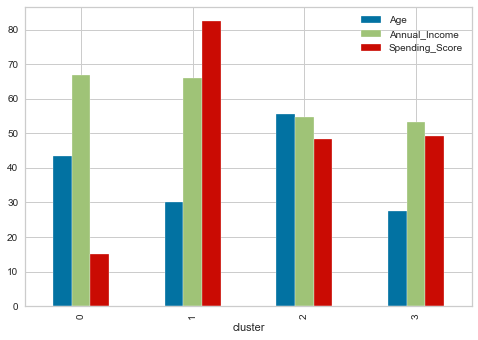

In [81]:
df.groupby(x1.cluster).mean().iloc[:,:-1].plot(kind='bar')
plt.show()
# Bu cluster lar (Age ve Spending_Score ile oluşturulan) bize fazla bir insight vermiyor.

### Conclusion

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

NOT : Değerlendirmeler Annual_Score ve Spending_Score göre oluşturulan cluster lara göre yapılmıştır. 


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___